### 최종 실습 프로젝트
- ecommerce_sales_data.csv 파일 활용

당신은 한 온라인 쇼핑몰의 데이터 분석가로 고용되었다. 쇼핑몰의 판매 데이터를 분석하여 고객의 구매 패턴을 파악하고, 중요한 인사이트를 도출하는 것이 이번 프로젝트의 목표다. 이를 통해 향후 마케팅 전략을 제시하고자 한다. ecommerce_sales_data.csv 파일을 통해 주어진 데이터는 고객의 주문 기록, 상품 정보, 판매 데이터 등을 포함하고 있다. 주어진 데이터를 분석하여 아래의 질문에 답하라.

- **데이터 설명**:
    - **OrderID**: 주문 ID
    - **Product**: 주문한 상품 이름
    - **Category**: 상품의 카테고리 (예: Electronics, Clothing 등)
    - **Quantity**: 주문 수량
    - **Price**: 상품의 가격
    - **CustomerID**: 고객 ID
    - **BirthDate**: 고객 생일
    - **OrderDate**: 주문 날짜
    - **Country**: 주문한 고객의 국가

1. **데이터 탐색 및 전처리**
    1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.
    2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.
    3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.

In [71]:
# 1. 데이터셋을 로드하고 상위 5개의 데이터를 출력하세요.

import numpy as np
import pandas as pd
df = pd.read_csv('./data/ecommerce_sales_data.csv')
df.head()


,OrderID,Product,Category,Quantity,Price,CustomerID,Birthdate,OrderDate,Country
0,1,역사책,Books,5,37000,1071,1980-08-08,2024-06-10 17:18,미국
1,2,셔츠,Clothing,5,20000,1526,1967-08-09,2023-11-18 18:45,독일
2,3,노트북,Electronics,4,8000,1252,1973-04-07,2023-10-15 11:19,중국
3,4,자전거,Sports,1,8000,1670,1970-04-08,2024-07-19 2:19,일본
4,5,헤드폰,Electronics,3,26000,1838,1992-05-19,2024-01-20 20:34,대한민국


In [72]:
# 2. 결측값이 있는 열이 있는지 확인하고, 결측값이 있는 경우 적절한 방법으로 처리하세요.

# df.isnull().sum()
df['Price'] = df['Price'].fillna(df['Price'].mean())

df['Country'] = df['Country'].fillna('Unknown')

df['Quantity'] = df['Quantity'].fillna(0)

# print(df)
df.isnull().sum()



OrderID       0
Product       0
Category      0
Quantity      0
Price         0
CustomerID    0
Birthdate     0
OrderDate     0
Country       0
dtype: int64

In [73]:
# 3. 각 열의 데이터 타입을 확인하고, **OrderDate** 열을 datetime 형식으로 변환하세요.
print(df.dtypes)
df['OrderDate'] = pd.to_datetime(df['OrderDate'])


OrderID        int64
Product       object
Category      object
Quantity       int64
Price          int64
CustomerID     int64
Birthdate     object
OrderDate     object
Country       object
dtype: object


2. **매출 분석**
    1. **매출액**(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
        - 매출액 = `Quantity` * `Price`
    2. 월별 총 매출액을 집계하여 시각화하세요.
        - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.
    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.

In [74]:
# 1 매출액(총 판매 금액)을 계산하는 새로운 열 `TotalRevenue`를 생성하세요.
       # - 매출액 = `Quantity` * `Price`
df['TotalRevenue'] = df['Quantity'] * df['Price']


c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure

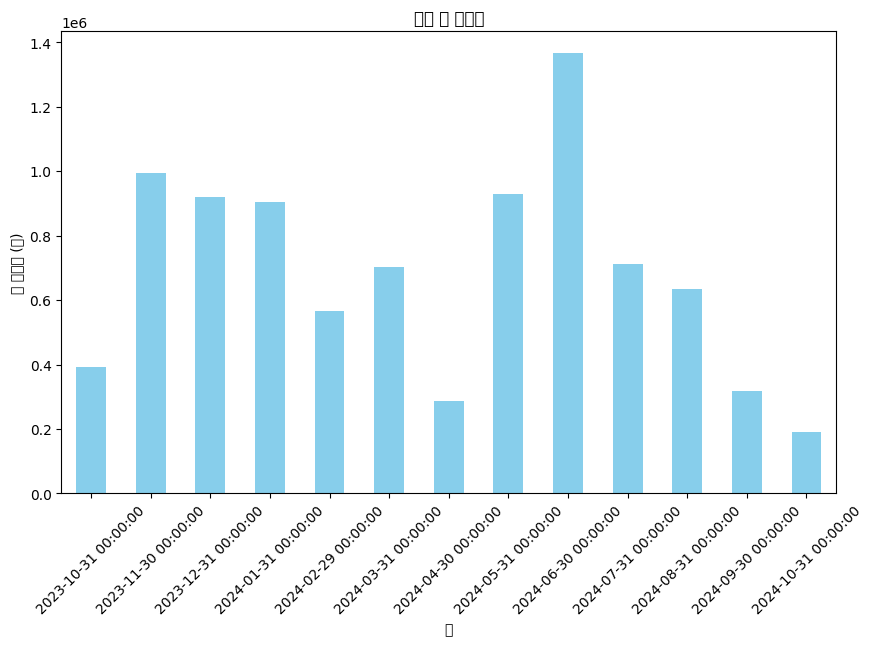

In [75]:
#월별 총 매출액을 집계하여 시각화하세요.
       # - 힌트: `resample()`을 사용하여 월별로 데이터를 집계하세요.

#왜 뭘 해도 꺠질까;

import matplotlib.pyplot as plt
from matplotlib import font_manager

# font_path = "C:/Windows/Fonts/malgun.ttf"  
# fontprop = font_manager.FontProperties(fname=font_path)

df['OrderDate'] = pd.to_datetime(df['OrderDate'])

df.set_index('OrderDate', inplace=True)

df['TotalRevenue'] = df['Quantity'] * df['Price']

monthly_sales = df.resample('M')['TotalRevenue'].sum()

plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='skyblue')

plt.title('월별 총 매출액')
plt.xlabel('월')
plt.ylabel('총 매출액 (원)')

plt.xticks(rotation=45)

plt.show()

In [76]:
#    3. 카테고리별로 매출액이 가장 높은 상위 3개의 카테고리를 구하세요.
category = df.groupby('Category')['TotalRevenue'].sum()

top_3 = category.nlargest(3)

print(top_3)


Category
Food           1966000
Electronics    1746000
Beauty         1493000
Name: TotalRevenue, dtype: int64


In [77]:
#    4. 국가별 총 매출액을 계산하고, 매출액이 가장 높은 5개 국가를 출력하세요.
national = df.groupby('Country')['TotalRevenue'].sum()

print(national)

top_5 = category.nlargest(5)

print(top_5)

Country
대한민국    1419000
독일      1973000
미국      2238000
일본      1523000
중국      1766000
Name: TotalRevenue, dtype: int64
Category
Food           1966000
Electronics    1746000
Beauty         1493000
Books          1378000
Clothing       1279000
Name: TotalRevenue, dtype: int64


3. **고객 분석**
    1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
    2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
    3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.
        - 힌트: 고객의 연령대는 따로 제공되지 않으므로, 가정 데이터를 추가해 임의로 분류할 수 있습니다.

In [78]:
    # 1. 고객별로 총 매출액을 계산한 후, 상위 5명의 고객을 출력하세요.
customer = df.groupby('CustomerID')['TotalRevenue'].sum()

print(customer)

top_5 = customer.nlargest(5)

print(top_5)

CustomerID
1007    334000
1029    165000
1034     49000
1038    173000
1039    138000
         ...  
1947    136000
1951     48000
1963    165000
1967    100000
1982    150000
Name: TotalRevenue, Length: 111, dtype: int64
CustomerID
1007    334000
1354    245000
1141    241000
1589    215000
1632    192000
Name: TotalRevenue, dtype: int64


In [79]:
    # 2. 주문 횟수가 가장 많은 상위 5명의 고객을 출력하세요.
customer_cnt = df['CustomerID'].value_counts()

print(customer_cnt)

top_5 = customer_cnt.nlargest(5)

print(top_5)


CustomerID
1141    2
1278    2
1007    2
1038    2
1496    2
       ..
1494    1
1640    1
1967    1
1329    1
1951    1
Name: count, Length: 111, dtype: int64
CustomerID
1141    2
1278    2
1007    2
1038    2
1496    2
Name: count, dtype: int64


In [80]:
    # 3. **연령대**에 따라 고객을 분류하고, 각 연령대별로 가장 많이 구매한 상품의 카테고리를 구하세요.

bins = [0, 19, 29, 39, 49, 59, 100]  
labels = ['10대', '20대', '30대', '40대', '50대', '60대 이상']  


df['Birthdate'] = pd.to_datetime(df['Birthdate'])
df['Age'] = (pd.to_datetime('today') - df['Birthdate']).dt.days // 365


df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_group_top_product = df.groupby(['AgeGroup', 'Product'])['Quantity'].sum().reset_index()


top_products = age_group_top_product.loc[age_group_top_product.groupby('AgeGroup')['Quantity'].idxmax()]


top_products_with_category = top_products.merge(df[['Product', 'Category']], on='Product', how='left')


print(top_products_with_category[['AgeGroup', 'Product', 'Category', 'Quantity']])

   AgeGroup Product     Category  Quantity
0       10대      과자         Food         0
1       10대      과자         Food         0
2       10대      과자         Food         0
3       10대      과자         Food         0
4       10대      과자         Food         0
5       10대      과자         Food         0
6       20대     노트북  Electronics         6
7       20대     노트북  Electronics         6
8       20대     노트북  Electronics         6
9       20대     노트북  Electronics         6
10      20대     노트북  Electronics         6
11      30대     과학책        Books        13
12      30대     과학책        Books        13
13      30대     과학책        Books        13
14      30대     과학책        Books        13
15      30대     과학책        Books        13
16      40대      향수       Beauty        13
17      40대      향수       Beauty        13
18      40대      향수       Beauty        13
19      40대      향수       Beauty        13
20      40대      향수       Beauty        13
21      50대      셔츠     Clothing        11
22      50대

4. **상품 분석**
    1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
    2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
    3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

In [81]:
    # 1. 가장 많이 판매된 상위 5개의 상품을 출력하세요.
top_selling = df.groupby('Product')['Quantity'].sum()
# print(top_selling)

top_5 = top_selling.nlargest(5)

print(top_5)


Product
셔츠     25
립스틱    22
소설     21
역사책    20
커피     20
Name: Quantity, dtype: int64


In [82]:
    # 2. **카테고리별**로 가장 많이 판매된 상품을 찾아 출력하세요.
category_sales = df.groupby(['Category', 'Product'])['Quantity'].sum()

top_selling_in_category = category_sales.groupby('Category').idxmax()

print(top_selling_in_category)

Category
Beauty              (Beauty, 립스틱)
Books                 (Books, 소설)
Clothing           (Clothing, 셔츠)
Electronics    (Electronics, 노트북)
Food                   (Food, 커피)
Sports             (Sports, 요가매트)
Name: Quantity, dtype: object


In [83]:
    # 3. **평균 구매 수량**이 가장 높은 상위 3개의 상품을 출력하세요.

average_quantity = df.groupby('Product')['Quantity'].mean()

top_3_avg_quantity = average_quantity.sort_values(ascending=False).head(3)

# 3. 결과 출력
print(top_3_avg_quantity)

Product
자기계발    5.0
주스      5.0
커피      4.0
Name: Quantity, dtype: float64


5. **시간 분석**
    1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
    2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.
    3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

In [84]:
    # 1. 주문 날짜별로 **주별** 매출액을 계산하고 시각화하세요.
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['TotalRevenue'] = df['Quantity'] * df['Price']

weekly_sales = df.resample('W', on='OrderDate')['TotalRevenue'].sum()

plt.figure(figsize=(10, 6))
weekly_sales.plot(kind='line', marker='o')
plt.title('주별 총 매출액')
plt.xlabel('주')
plt.ylabel('총 매출액 (원)')
plt.xticks(rotation=45)
plt.show()

KeyError: 'OrderDate'

C:\Users\leegw\AppData\Local\Temp\ipykernel_15400\3451643352.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['TotalRevenue'] = df_filtered['Quantity'] * df_filtered['Price']
c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current fon

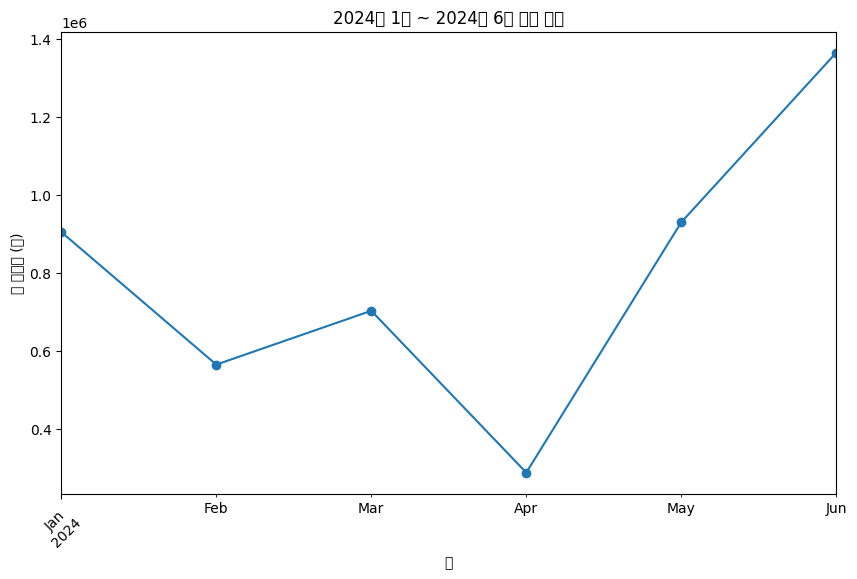

In [53]:
    # 2. 특정 기간(예: 2024년 1월 ~ 2024년 6월) 동안의 매출 추이를 분석하고 시각화하세요.



df['OrderDate'] = pd.to_datetime(df['OrderDate'])


start_date = '2024-01-01'
end_date = '2024-06-30'
df_filtered = df[(df['OrderDate'] >= start_date) & (df['OrderDate'] <= end_date)]


df_filtered['TotalRevenue'] = df_filtered['Quantity'] * df_filtered['Price']

monthly_sales = df_filtered.resample('M', on='OrderDate')['TotalRevenue'].sum()

# 5. 시각화
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('2024년 1월 ~ 2024년 6월 매출 추이')
plt.xlabel('월')
plt.ylabel('총 매출액 (원)')
plt.xticks(rotation=45)
plt.show()



C:\Users\leegw\AppData\Local\Temp\ipykernel_15400\2165817286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  korea['OrderTime'] = korea['OrderDate'].dt.hour
c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\leegw\anaconda3\envs\gw\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(byte

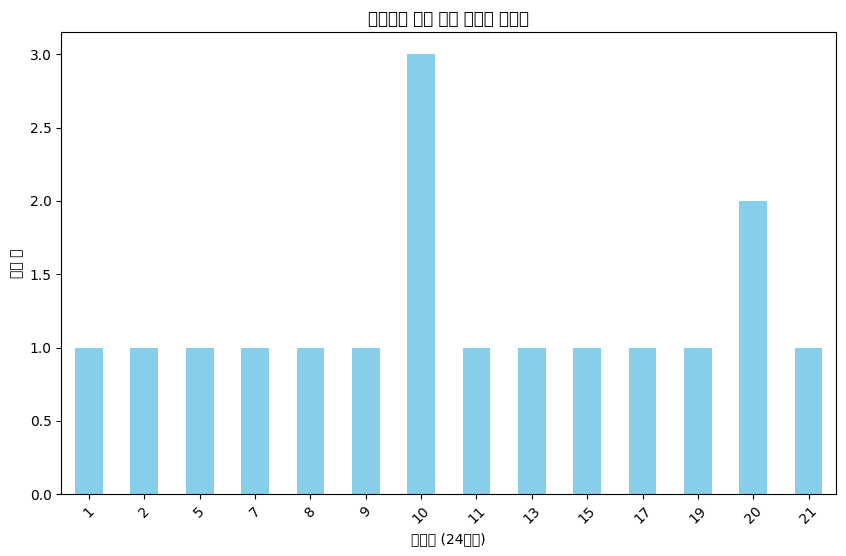

In [58]:
    # 3. 특정 국가에서 가장 많이 주문한 시간대를 분석하고, 이를 시각화하여 인사이트를 도출하세요.

korea = df[df['Country'] == '대한민국']

korea['OrderTime'] = korea['OrderDate'].dt.hour  

hourly_orders = korea['OrderTime'].value_counts().sort_index()  

plt.figure(figsize=(10, 6))
hourly_orders.plot(kind='bar', color='skyblue')
plt.title('미국에서 가장 많이 주문한 시간대')
plt.xlabel('시간대 (24시간)')
plt.ylabel('주문 수')
plt.xticks(rotation=45)
plt.show()
print("한국인은 출근해서 자리잡고 10시에 주문을 많이 한다!!!!")

6. **추가 분석**
    1. 고객의 **재구매율**을 분석하세요.
        - 재구매율 = 한 고객이 여러 번 주문한 비율
    2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.

In [60]:
# 고객의 **재구매율**을 분석하세요.
#         - 재구매율 = 한 고객이 여러 번 주문한 비율

customer_order_count = df['CustomerID'].value_counts()

repeat_customers = customer_order_count[customer_order_count > 1].count()

total_customers = customer_order_count.count()

repurchase_rate = (repeat_customers * 100)/ total_customers 


print(f"재구매율:", repurchase_rate)

재구매율: 8.108108108108109


In [ ]:
    # 2. 상품 카테고리별 **할인**을 적용한 판매 데이터를 사용하여 할인율이 높은 카테고리의 매출액을 분석하세요.